In [468]:
import torch
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [469]:
df = pd.read_csv('houseprice.csv')
df.head(
)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [470]:
df.tail(

)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [471]:
print(df.isnull().sum().to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [472]:
nanColumn = df.columns[df.isnull().any()].tolist()
# Select only numeric columns from nanColumn
numeric_nanColumn = df[nanColumn].select_dtypes(include=np.number).columns.tolist()
df[numeric_nanColumn] = df[numeric_nanColumn].fillna(df[numeric_nanColumn].median())
categorical_nanColumn = df[nanColumn].select_dtypes(exclude=np.number).columns.tolist()

for col in categorical_nanColumn:
    mode_value = df[col].mode()[0]  # Get the most frequent value
    df[col] = df[col].fillna(" ")
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,,Reg,Lvl,AllPub,...,0,,,,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,,Reg,Lvl,AllPub,...,0,,,,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,,IR1,Lvl,AllPub,...,0,,,,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,,IR1,Lvl,AllPub,...,0,,,,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,,IR1,Lvl,AllPub,...,0,,,,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,,Reg,Lvl,AllPub,...,0,,,,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,,Reg,Lvl,AllPub,...,0,,MnPrv,,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,,Reg,Lvl,AllPub,...,0,,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,,Reg,Lvl,AllPub,...,0,,,,0,4,2010,WD,Normal,142125


In [473]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,,Reg,Lvl,AllPub,...,0,,,,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,,Reg,Lvl,AllPub,...,0,,,,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,,IR1,Lvl,AllPub,...,0,,,,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,,IR1,Lvl,AllPub,...,0,,,,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,,IR1,Lvl,AllPub,...,0,,,,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,,Reg,Lvl,AllPub,...,0,,,,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,,Reg,Lvl,AllPub,...,0,,MnPrv,,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,,Reg,Lvl,AllPub,...,0,,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,,Reg,Lvl,AllPub,...,0,,,,0,4,2010,WD,Normal,142125


In [474]:
from sklearn.preprocessing import OneHotEncoder
categorical_features = df.select_dtypes(include=['object','category']).columns.tolist() # Use 'df' here

encoder=OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_features]) # Use 'df' here
feature_names = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_data, columns=feature_names) # 'pd' still refers to pandas


In [475]:
encoded_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_,Alley_Grvl,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [476]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,,Reg,Lvl,AllPub,...,0,,,,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,,Reg,Lvl,AllPub,...,0,,,,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,,IR1,Lvl,AllPub,...,0,,,,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,,IR1,Lvl,AllPub,...,0,,,,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,,IR1,Lvl,AllPub,...,0,,,,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,,Reg,Lvl,AllPub,...,0,,,,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,,Reg,Lvl,AllPub,...,0,,MnPrv,,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,,Reg,Lvl,AllPub,...,0,,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,,Reg,Lvl,AllPub,...,0,,,,0,4,2010,WD,Normal,142125


In [477]:
df.drop(categorical_features, axis=1, inplace = True)

In [478]:
df = pd.concat([df, encoded_df], axis=1)

In [479]:
df


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [480]:
from sklearn.model_selection import train_test_split

In [481]:
target_column = 'SalePrice'


other_columns = [col for col in df.columns if col != target_column]
df = df[other_columns + [target_column]]

x=df.iloc[:,:-1]
y=df.iloc[:,-1]
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=98)

In [482]:
xtest

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1119,1120,20,70.0,7560,5,5,1959,1959,0.0,369,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1453,1454,20,90.0,17217,5,5,2006,2006,0.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1432,1433,30,60.0,10800,4,6,1927,2007,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
827,828,20,65.0,8529,7,5,2001,2001,0.0,20,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
737,738,60,72.0,10463,8,5,2005,2005,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1334,50,60.0,7200,5,6,1938,1995,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
512,513,20,70.0,9100,5,5,1958,1958,0.0,521,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
58,59,60,66.0,13682,10,5,2006,2006,1031.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
899,900,20,65.0,6993,5,7,1961,1994,0.0,465,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [483]:
ytest

,SalePrice
1119,133700
1453,84500
1432,64500
827,189000
737,239900
...,...
1333,125500
512,129900
58,438780
899,135000


In [484]:
import torch.nn as nn

In [485]:
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(xtrain)
xtrain = scalar.transform(xtrain)
xtrain = torch.FloatTensor(xtrain)
scalar.fit(xtest)
xtest = scalar.transform(xtest)
xtest = torch.FloatTensor(xtest)
ytrain = torch.FloatTensor(ytrain.values)
ytest = torch.FloatTensor(ytest.values)

In [486]:
class ANN(nn.Module):
  def __init__(self, inp, out, hid1, hid2, hid3):
    super().__init__()
    self.layer1=nn.Linear(inp, hid1)
    self.layer2=nn.Linear(hid1, hid2)
    self.layer3=nn.Linear(hid2, hid3)
    self.outlayer=nn.Linear(hid3, out)

  def forward(self,x):
    x=F.relu(self.layer1(x))
    x=F.relu(self.layer2(x))
    x=F.relu(self.layer3(x))
    x=self.outlayer(x)
    return x

In [487]:
torch.manual_seed(29)
model=ANN(304,1,60,200,100)
print(model.parameters)





<bound method Module.parameters of ANN(
  (layer1): Linear(in_features=304, out_features=60, bias=True)
  (layer2): Linear(in_features=60, out_features=200, bias=True)
  (layer3): Linear(in_features=200, out_features=100, bias=True)
  (outlayer): Linear(in_features=100, out_features=1, bias=True)
)>


In [488]:
loss_func=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)


error=38861725696.0, epoch=1
error=619163392.0, epoch=101
error=263922304.0, epoch=201
error=163123840.0, epoch=301
error=112348880.0, epoch=401
error=81926472.0, epoch=501
error=61037792.0, epoch=601
error=46005560.0, epoch=701
error=35119724.0, epoch=801
error=26284704.0, epoch=901
error=19453184.0, epoch=1001
error=14476887.0, epoch=1101
error=10613727.0, epoch=1201
error=7580325.5, epoch=1301
error=5444368.0, epoch=1401
error=3832423.5, epoch=1501
error=2665324.5, epoch=1601
error=1827648.125, epoch=1701
error=1223219.625, epoch=1801
error=825156.875, epoch=1901
error=564218.4375, epoch=2001
error=386190.8125, epoch=2101
error=266769.25, epoch=2201
error=185131.453125, epoch=2301
error=127950.1796875, epoch=2401
error=86263.59375, epoch=2501
error=58782.234375, epoch=2601
error=39857.66796875, epoch=2701
error=27187.734375, epoch=2801
error=18589.888671875, epoch=2901
error=12807.9990234375, epoch=3001
error=8819.546875, epoch=3101
error=6096.361328125, epoch=3201
error=4221.101074

Text(0.5, 0, 'Epoch')

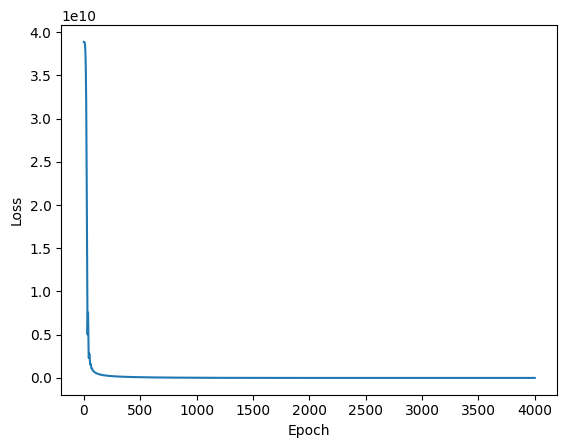

In [489]:
# Reshape ytrain to have the same shape as ypred
ytrain = ytrain.view(-1, 1)
epochs=4000
final_loss = []
x=xtrain
for i in range(epochs):
  ypred=model.forward(x)
  loss = loss_func(ypred,ytrain)
  final_loss.append(loss)
  if i%100==1:
    print(f"error={loss}, epoch={i}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(range(epochs), [loss.detach().numpy() for loss in final_loss]) # Convert to NumPy after detaching
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [492]:
with torch.no_grad():
  predictions=model(xtest)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(ytest, predictions.numpy())
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2322934784.0
